# Problem statement:
Create a Predictive model which can tell weather to approve a loan application or not?
Target Variable: Loan_Status
Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.
Loan_Status="N" means the loan was rejected.
Loan_Status="Y" means the loan was approved.

- Reading the data in python
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)

In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
LoanData=pd.read_excel('D://Files//loan_data.xlsx')

In [2]:
# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
LoanData.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5384.06872,Q6
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN,NaN


Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='Loan_Status'>

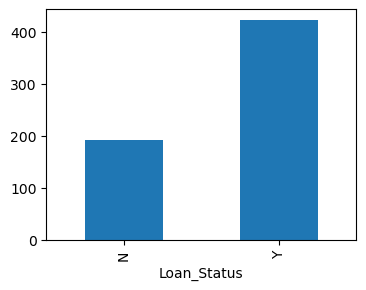

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, Does this column affect the approval or rejection of loan? If the answer is a clear "No" the remove the column immediately from the data otherwise keep the column for further analysis.

In this data "Loan_ID" is one such column which is useless to us because it does not affect the approval or rejection of a loan. Hence, we will remove "Loan_ID" from the data.

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Unnamed: 13        2 non-null      object 
 14  Unnamed: 14        4 non-null      float64
 15  Unnamed: 15        1 non-null      object 
dtypes: float64(5), int64(1), o

### Removing useless variables from data
Based on the above report, removing "Loan_ID" column from the data

In [5]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5384.068720,Q6
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN,NaN
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,5450.596859,NaN
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN,NaN,NaN
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,SD1,6113.940585,NaN


#### Visual Exploratory Data Analysis
Categorical variables: Bar plot
Continuous variables: Histogram

Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted eight categorical predictors in the data

Categorical Predictors: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

We use bar charts to see how the data is distributed for these categorical columns.

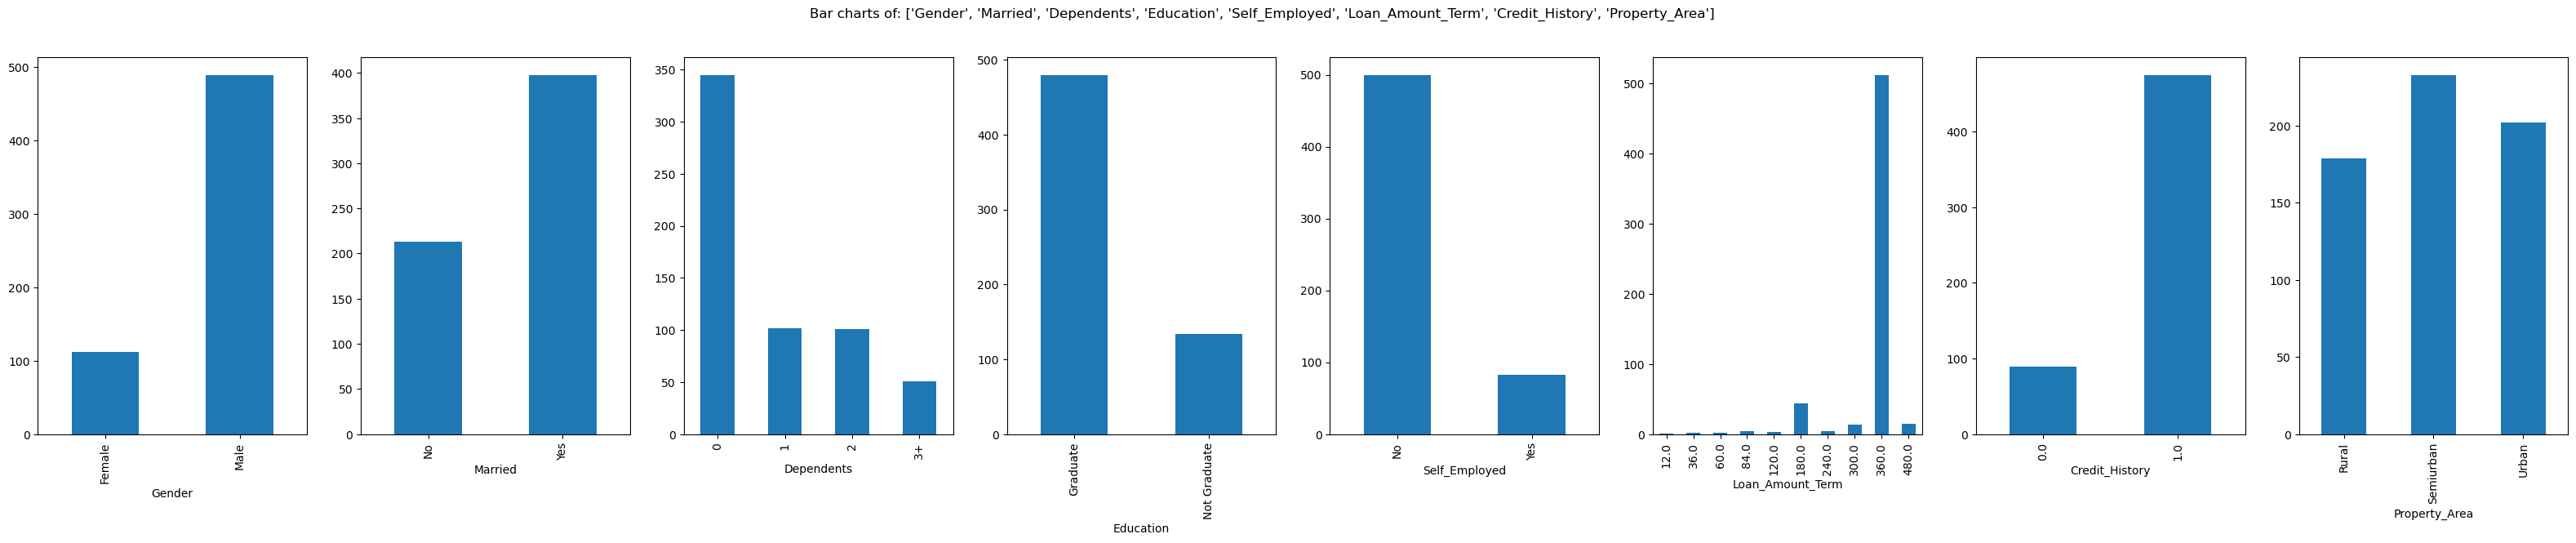

In [6]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

#### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Property_Area" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "Loan_Amount_Term" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "Loan_Amount_Term" have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected.

'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

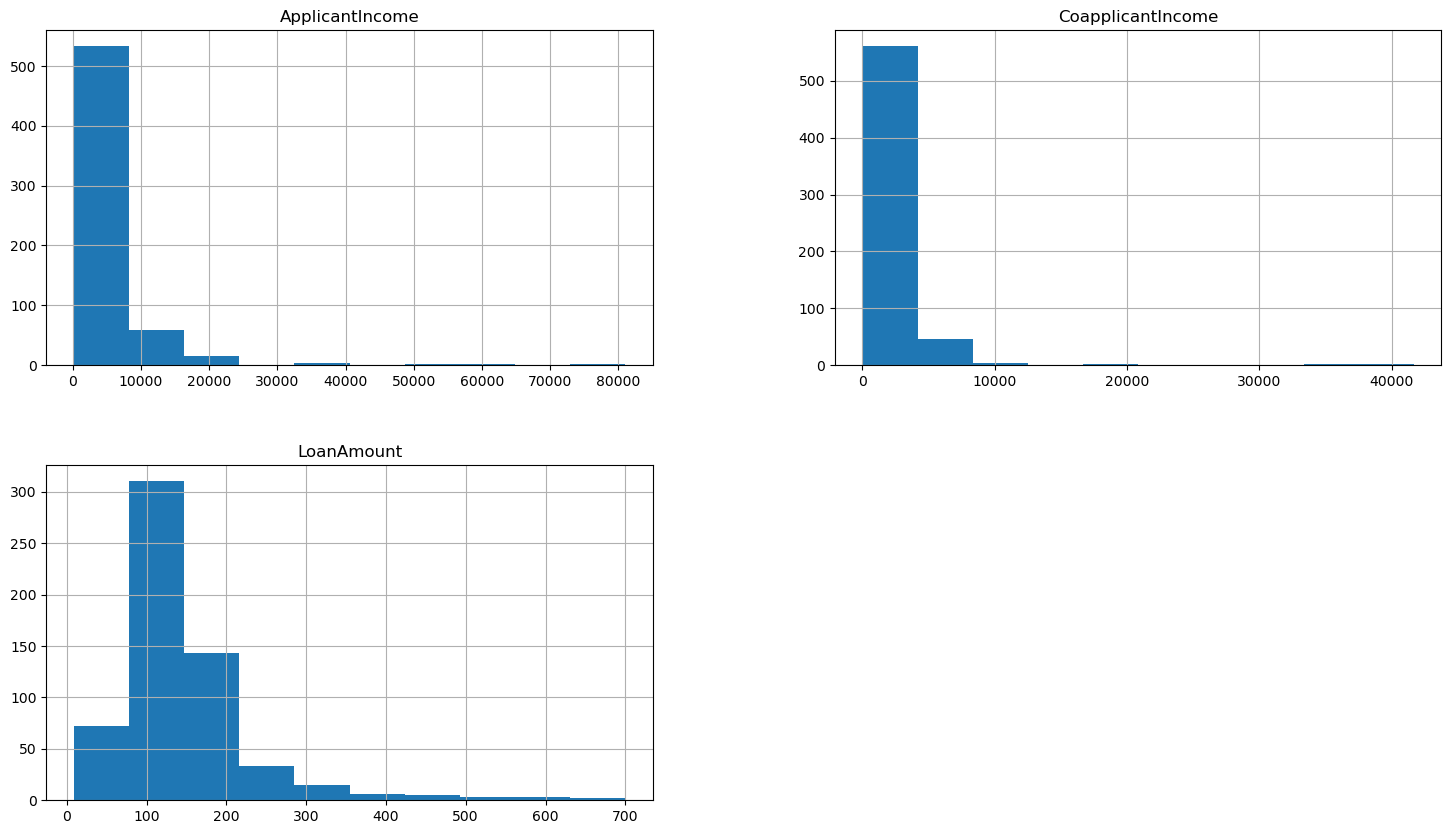

In [7]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

##### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "LoanAmount", there are around 320 rows in data that has a Loan Amount between 90 to 150.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
LoanAmount: Selected. Slightly skewed distribution, acceptable.

#### Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.
Option-2: Impute the outlier values with a logical business value
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

##### Replacing outliers for 'ApplicantIncome'

In [8]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

Above result shows the nearest logical value is 23803, hence, replacing any value above 30000 with it.

In [9]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_29576\1945176176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803


In [10]:
#### Replacing outliers for 'CoapplicantIncome'

In [11]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

Above result shows the nearest logical value is 11300, hence, replacing any value above 15000 with it.

In [12]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_29576\343234114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300


##### Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

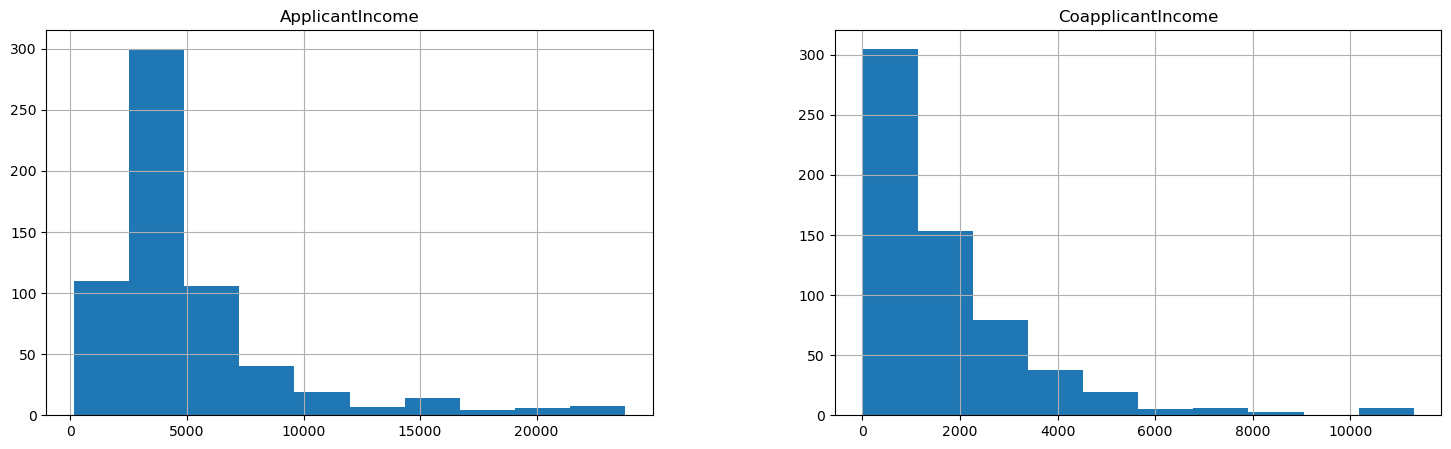

In [13]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

#### Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [14]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Unnamed: 13          612
Unnamed: 14          610
Unnamed: 15          613
dtype: int64

In [15]:
# Imputing the missing values
# Using MODE for categorical columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [16]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Unnamed: 13          612
Unnamed: 14          610
Unnamed: 15          613
dtype: int64

Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot
Categorical Vs Continuous---- Box Plot
Categorical Vs Categorical---- Grouped Bar Plots
Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square test
In this case study the Target variable is categorical, hence below two scenarios will be present

Categorical Target Variable Vs Continuous Predictor
Categorical Target Variable Vs Categorical Predictor

#### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

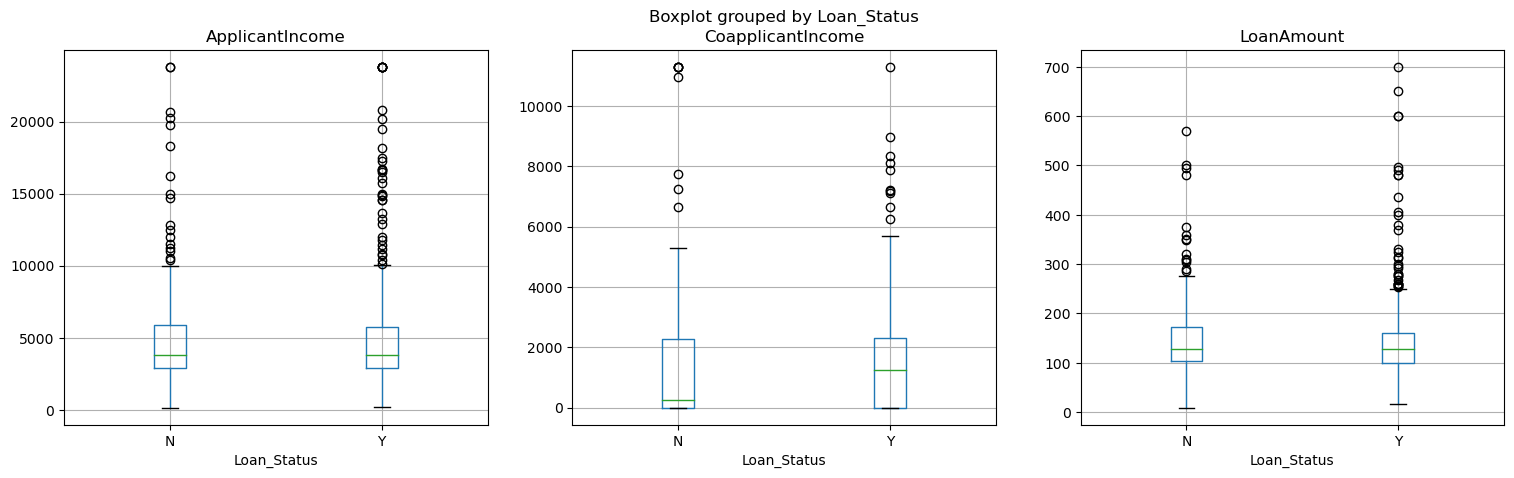

In [17]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "ApplicantIncome" Vs "Loan_Status". The boxes are in the same line! It means that people whose loan was rejected and whose loan was approved have same kind of incomes. Hence, I cannot distinguish between approval and rejection based on the income of an applicant. So this column is NOT correlated with the Loan_Status.

The other other two charts also exhibit same characteristics, hence all three continuous predictors are not correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [18]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [19]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=LoanData, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.41132365467797827


[]

The results of ANOVA confirm our visual analysis using box plots above.

All three columns are NOT correlated with Loan_Status.

#### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [20]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


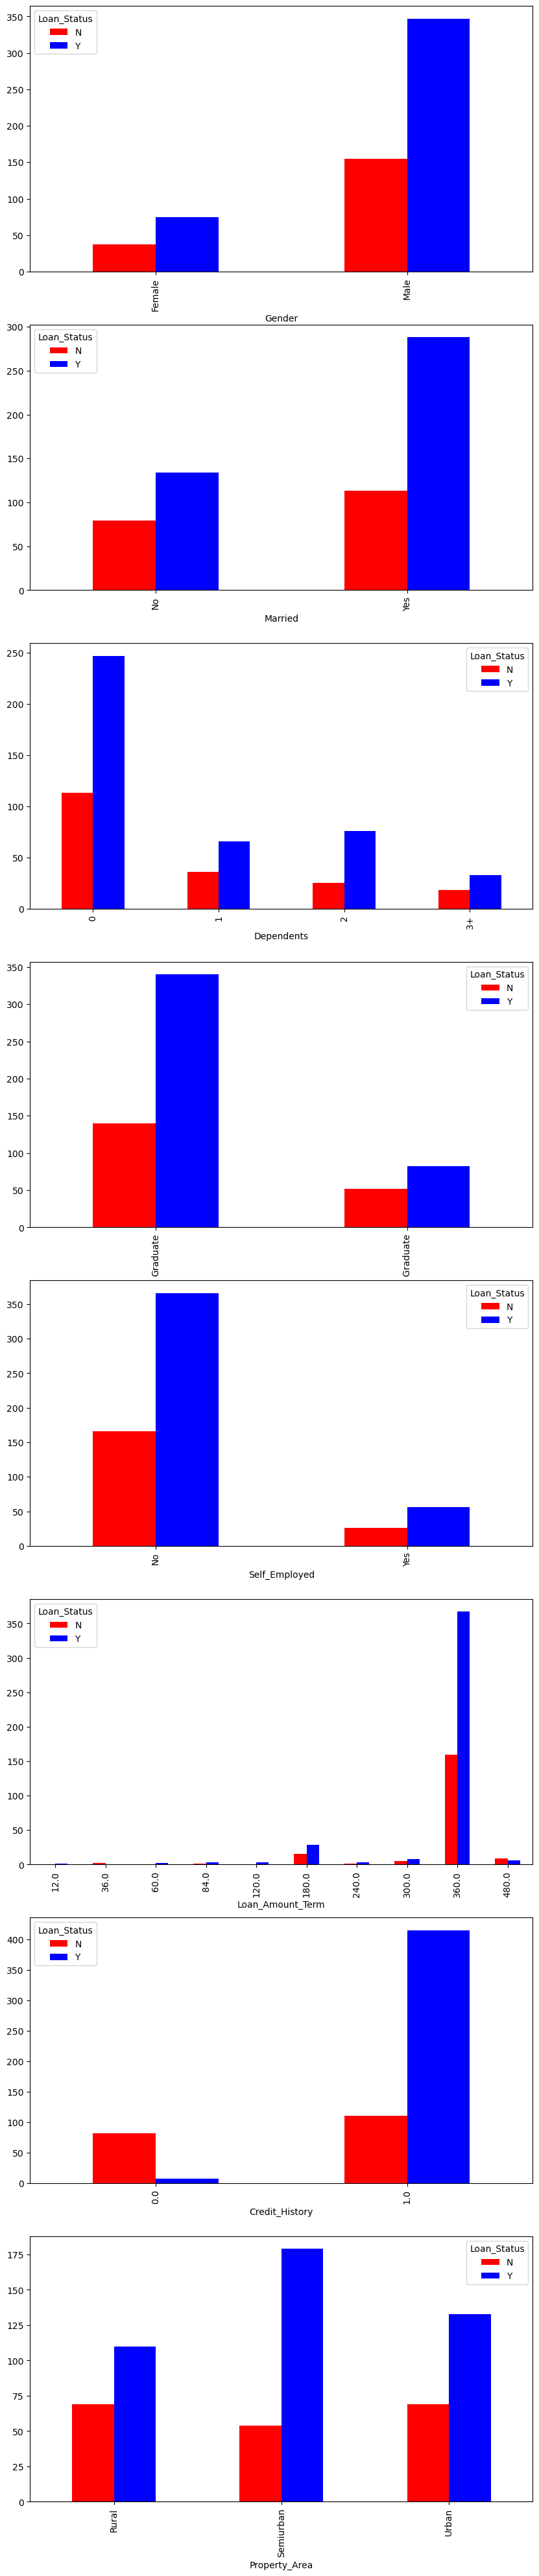

In [21]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

#### Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Gender Vs Loan_Status plot. The approved vs rejected ratio for Males is similar to Females, it means Gender does not affect the Loan approval!. Hence, these two variables are not correlated.

On the other hand, look at the Credit_History vs Loan_Status plot. The number of approvals are very high if Credit_History=1.0. It means Credit_History affects the loan approval! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True
More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [22]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [23]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

<AxesSubplot:>

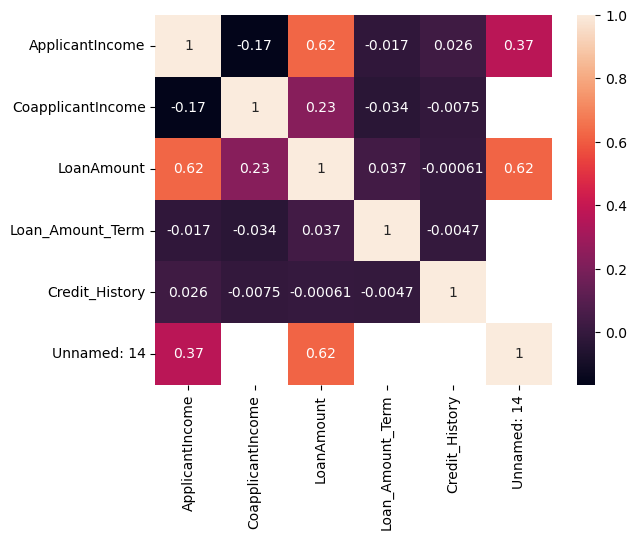

In [24]:
import seaborn as sns
sns.heatmap(LoanData.corr(),annot=True)

In [25]:
### Covariance
LoanData.cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Unnamed: 14
ApplicantIncome,1.596286e+07,-1.287067e+06,209555.030203,-4383.793699,37.050784,205023.674974
CoapplicantIncome,-1.287067e+06,3.749861e+06,37785.033662,-4296.161450,-5.144811,0.000000
LoanAmount,2.095550e+05,3.778503e+04,7074.026707,200.284477,-0.017998,8600.985336
Loan_Amount_Term,-4.383794e+03,-4.296161e+03,200.284477,4151.048244,-0.106806,0.000000
Credit_History,3.705078e+01,-5.144811e+00,-0.017998,-0.106806,0.124142,0.000000
Unnamed: 14,2.050237e+05,0.000000e+00,8600.985336,0.000000,0.000000,162506.558505


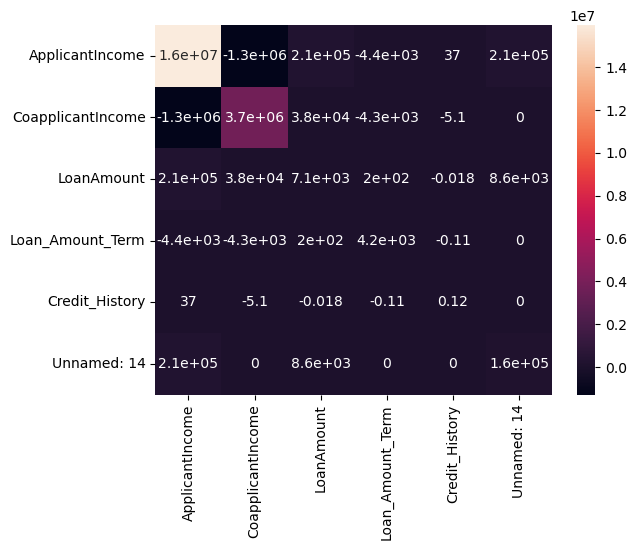

In [26]:
cov_matrix=LoanData.cov()
sns.heatmap(cov_matrix, annot=True)
plt.show()

We did Exploratory data Analysis on the features of this dataset and saw how each feature is
distributed. We also calculated probabilities to prove an association among the Independent
variables and the Target variable. And based on the results, we assumed whether or not there
is an association.
Lastly, Statistical Tests were conducted so as to confirm or deny the assumptions we made.

In [27]:
LoanData.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,NaN,5384.06872,Q6
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN,NaN


# Model Building -Logisitic Regression

In [30]:
# selecting the features
selected_columns=['Married','Education','Credit_History','Property_Area']
Data_log=LoanData[selected_columns]
Data_log.head(2)

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural


In [31]:
# convert categorical into numeric
Data_log=pd.get_dummies(Data_log)

In [32]:
Data_log['Loan_Status']=LoanData['Loan_Status']
Data_log.head(2)

,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1.0,1,0,1,0,0,0,1,Y
1,1.0,0,1,1,0,1,0,0,N


In [35]:
# Split the data
X=Data_log.drop('Loan_Status',axis=1)
y=Data_log['Loan_Status']

from sklearn.preprocessing import MinMaxScaler
predictorscalar=MinMaxScaler()
predictorscalarFit=predictorscalar.fit(X)
X=predictorscalarFit.transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [36]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
LOG= clf.fit(X_train,y_train)
#prediction
prediction=LOG.predict(X_test)

In [37]:
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [39]:
# measure accuracy
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           N       0.89      0.40      0.55        63
           Y       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185

[[ 25  38]
 [  3 119]]


In [40]:
# printing overall accuracy
metrics.f1_score(y_test,prediction,average='weighted')

0.7496598335308012